# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

## titanic 데이터 설명
타이타닉호에 승선했던 탑승자 정보를 담고 있는 데이터이다. 데이터분석 필드에서는 교육용 및 입문용 데이터로 오랫동안 사랑받아 온 데이터이며  
탑승자 정보를 바탕으로 이 탑승자가 생존했는지 혹은 사망했는지 분류하는 모델링을 목적으로 제작 된 데이터입니다.  

**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home.dest : 출신

## 데이터 살펴보기
### 데이터 불러오기 

In [1]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
matplotlib.rc('font', family='Malgun Gothic')

In [2]:
# 데이터 로딩 및 확인
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# 기초통계량 확인
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
# unique한 변수의 개수 세기
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

- 데이터 요약을 보았을 때 음수값이 들어가있는 데이터는 존재하지 않는다는 것을 알 수 있음(따로 처리할 필요 x)
- survived, sex에 binary값이 잘 들어가있음을 알 수 있음
- pclass, embarked는 3가지의 카테고리로 나뉜다는 것을 알 수 있음
- 값 종류가 많은 age, fare는 범위별로 분류해 카테고리화하면 좋을 것 같다고 생각함

### 변수 타입과 결측치 확인하기`

- 목표변수 : survived
- 설명변수 : pclass, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked, boat, body, home.dest
    
EDA를 통해 생존에 영향을 미치는 잠재 인자를 도출해낸다.

In [5]:
# 데이터 종류 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


각 작업을 거친 후 데이터에 대한 리포트 혹은 시각화를 통해 얻을 수 있는 정보를 기술 해봅니다.  
위의 정보를 바탕으로 1309개의 샘플이 존재하지만 몇몇 개의 컬럼에는 결측치(비어있는 값)이 있음을 확인 할 수 있습니다.

(1309, 14)의 크기를 갖는 데이터

- name, sez, ticket, cabin, embarked, boat, home.dest 변수는 object형
- pclass, survived, sibsp, parch 변수는 int형
- age, fare, body 변수는 float형
- age, fare, cabin, embarked, boat, body, home.dest에 결측치가 존재함
- cabin, boat, body, home.dest에는 많은 결측치가 존재함

In [6]:
# 결측치 확인
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

- df.info()에서 확인한 것처럼 결측치가 많이 존재
- 결측치가 존재하는 변수들을 전처리할 필요가 있음
- 데이터를 확인한 후 전처리를 진행

## 데이터 전처리

In [7]:
# 데이터 15개만을 먼저 뽑아 데이터를 살펴보기
df.head(15)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


- 데이터를 보았을 때 전처리 해야할 것 확인
1. age, fare에 존재하는 결측치를 처리해야 한다.
2. age는 값 종류가 많기 때문에 분류를 하여 카테고리를 만들기로함
3. cabin과 embarked, boat, body, home.dest에 존재하는 결측치를 처리해야함
    - N이라는 새로운 값을 생성하여 그 값으로 대체시켜줌
4. cabin은 선실번호임으로 특징이 있을 것이라고 생각. -> 이 특징을 잡아서 변수를 다시 정의
5. sex, cabin, embarked는 object type의 변수들인데 머신러닝 알고리즘을 돌리기 전에 이것들을 label encoding하여 속성을 숫자형으로 바꾸는 작업이 필요하다. 그렇지만 이번 시간에는 EDA를 하여 데이터에 대한 이해를 하는 것이 목적이기 때문에 수행하지 않는다.

### age, fare에 존재하는 결측치 처리

<AxesSubplot:title={'center':'fare'}>

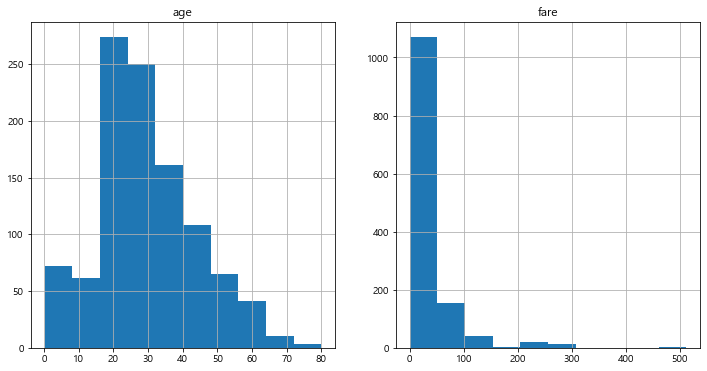

In [8]:
fig = plt.figure(figsize=(12,6))
# age histogram
graph1 = fig.add_subplot(1,2,1)
graph1.set_title('age')
df['age'].hist(ax=graph1)

# fare histogram
graph2 = fig.add_subplot(1,2,2)
graph2.set_title('fare')
df['fare'].hist(ax=graph2)

- 이 두 히스토그램을 살펴봤을 때 age는 비교적 데이터가 정규분포를 그리고 있지만 fare는 데이터가 한쪽으로 많이 치우쳐저 있기 때문에 age의 결측값은 평균을 채워넣을 수 있지만 fare의 결측값에는 최빈값을 넣는 것이 더 좋다.

In [9]:
# age, fare 결측치 평균값으로 대체
df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

In [10]:
df.isna().sum()
# age, fare의 결측치 처리 완료

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### age 카테고리화

In [11]:
# age를 카테고리화 하는 함수 생성
# 0보다 작은 값-> unknown, 5이하 -> baby, 12이하 -> child, 18이하 -> teenager, 25이하 -> student, 35이하-> young adult, 60이하 -> adult, 그 이상-> elderly
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 카테고리화한 Age_cat이라는 변수 새로 생성
df['age_cat'] = df['age'].apply(lambda x : get_category(x))

### cabin, embarked, boat, body, home.dest 결측치 처리

In [12]:
df['cabin'].fillna('N', inplace=True)
df['embarked'].fillna('N', inplace=True)
df['boat'].fillna('N', inplace=True)
df['body'].fillna('N', inplace=True)
df['home.dest'].fillna('N', inplace=True)

In [13]:
df.isna().sum()
# cabin, embarked, boat, body, home.dest의 결측치 처리 완료

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
age_cat      0
dtype: int64

### cabin(선실) 속성을 통한 처리

In [14]:
print('\n Cabin 값 분포 :\n', df['cabin'].value_counts())


 Cabin 값 분포 :
 N                  1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
C22 C26               4
                   ... 
E63                   1
B102                  1
B39                   1
D40                   1
F38                   1
Name: cabin, Length: 187, dtype: int64


- 선실 뒤의 번호는 별로 중요하지 않고 알파벳이 중요해보임
- 가장 앞 문자만 추출하여 변수에 저장

In [15]:
df['cabin'] = df['cabin'].str[:1]
print(df['cabin'].head()) # 앞 문자만 잘 들어갔음을 확인

0    B
1    C
2    C
3    C
4    C
Name: cabin, dtype: object


### sibsp, parch를 사용한 속성 생성

- sibsp와 parch 모두 가족 수에 대한 데이터이므로 이것으로 새로운 속성을 하나 또 생성해보기로함
- 가족이 1명이라도 있는 사람과 그렇지 않은 사람은 생존율에 차이가 있을 것이라고 생각하여 새로운 속성을 생성
- sibsp와 parch가 모두 없는 데이터와 sibsp와 parch 중 하나라도 있는 데이터로 나누어서 분석을 해보고자함

In [16]:
# sibsp가 0이고 parch가 0인 사람들은 family가 0 그렇지 않은 사람은 family를 1로 저장함
df['family'] = np.where((df['sibsp']==0)&(df['parch']==0),0,1)        
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,family
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B,S,2,N,"St Louis, MO",Young Adult,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,113781,151.5500,C,S,11,N,"Montreal, PQ / Chesterville, ON",Baby,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C,S,N,N,"Montreal, PQ / Chesterville, ON",Baby,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C,S,N,135.0,"Montreal, PQ / Chesterville, ON",Young Adult,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C,S,N,N,"Montreal, PQ / Chesterville, ON",Student,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,N,C,N,328.0,N,Teenager,1
1305,3,0,"Zabour, Miss. Thamine",female,29.881138,1,0,2665,14.4542,N,C,N,N,N,Young Adult,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,N,C,N,304.0,N,Young Adult,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,N,C,N,N,N,Young Adult,0


## 전체 데이터 살펴보기

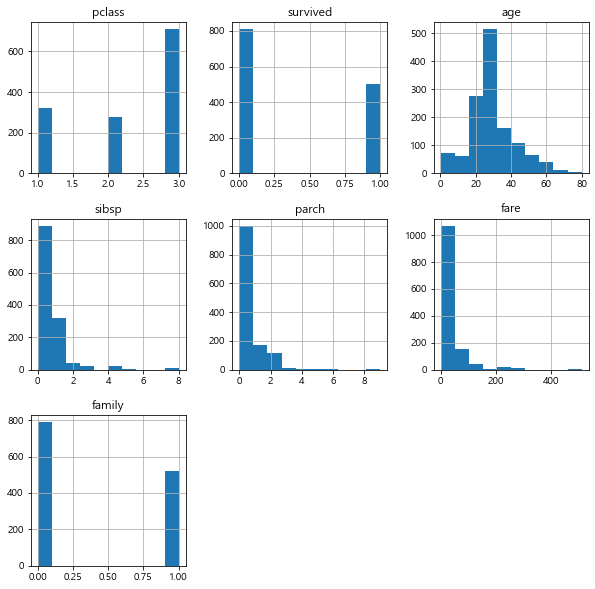

In [17]:
df.hist(figsize=(10,10))
pyplot.show()

- parch와 sibsp는 0인 자료의 수가 가장 많다. 
- fare는 대부분이 100이하에 분포해있고 500이상의 아주 큰 데이터도 존재한다.
- pclass가 3등급인 데이터의 수가 가장 많고 그 다음으로 1등급 2등급 순이다.
- 죽은 사람(0)보다 산 사람(1)이 더 많다.

<br>
가설 세워보기

1. 객실 등급에 따라서 생존율이 달랐을 것이다.
2. 나이에 따라서 생존율이 달랐을 것이다.
3. 성별에 따라서 생존율이 달랐을 것이다.
4. 형제 수 또는 자녀의 수에 따라서 생존율이 달랐을 것이다.
5. 지불한 운임에 따라서 생존율이 달랐을 것이다.
6. 선착장 정보에 따라서 생존율이 달랐을 것이다.

## 전체 생존률 살펴보기

<AxesSubplot:xlabel='survived', ylabel='count'>

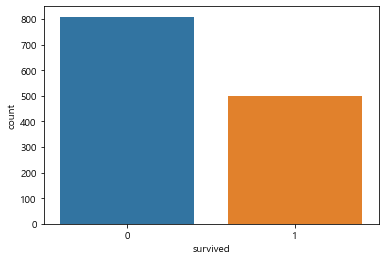

In [18]:
# 전체 데이터 중 죽은 사람과 산 사람의 비율
sns.countplot(x='survived', data=df)

### 성별에 따른 생존율

<AxesSubplot:xlabel='sex', ylabel='count'>

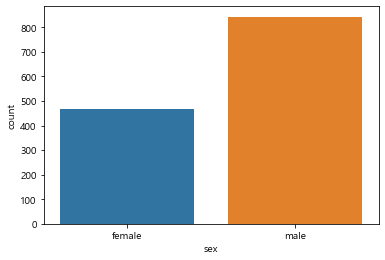

In [19]:
# 전체 데이터 중 여자, 남자 비율
sns.countplot(x='sex', data=df)

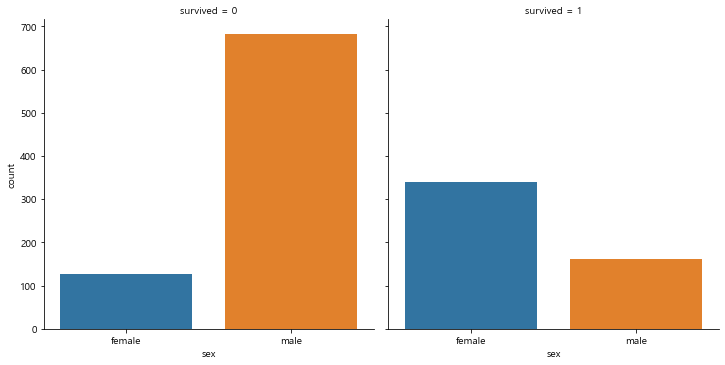

In [20]:
# 죽은 사람 중 남,여 수, 산 사람 중 남,여 수
sns.catplot(x='sex', col='survived', kind='count', data=df);

In [21]:
# 생존여부와 성별을 통한 그룹화
df.groupby(['survived','sex'])['survived'].count()

survived  sex   
0         female    127
          male      682
1         female    339
          male      161
Name: survived, dtype: int64

- 죽은 사람 중에서는 남자가 많았고 산 사람 중에서는 여자가 많았다.
- 전체 데이터는 남자 데이터가 더 많지만 여자가 더 많이 살아남았다.

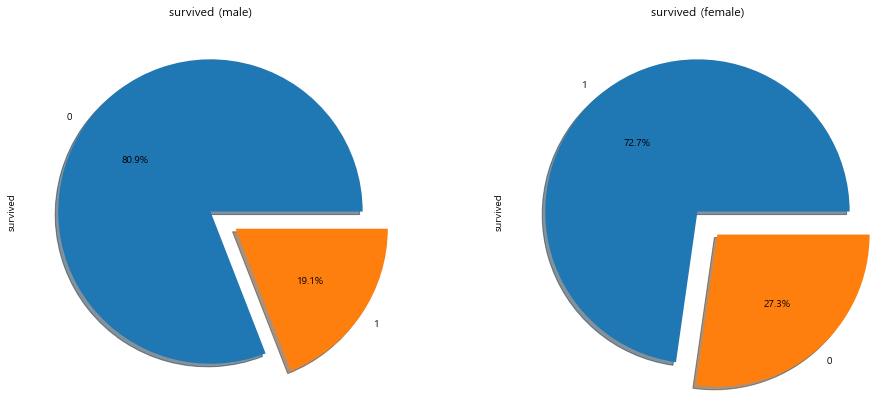

In [22]:
# 남자 중 몇 %가 살았는지, 여자 중 몇 %가 살았는지 알아보기 위해서 pie chart 그리기
f,ax=plt.subplots(1,2,figsize=(16,7))
df['survived'][df['sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df['survived'][df['sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('survived (male)')
ax[1].set_title('survived (female)')

plt.show()

- 남자의 81%는 죽었고, 여자의 72.7%는 살았다.

### Pclass 별

<AxesSubplot:xlabel='pclass', ylabel='count'>

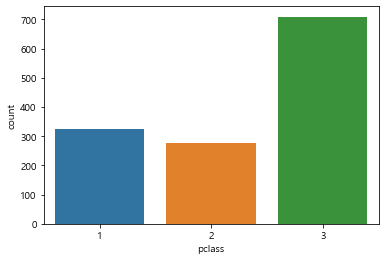

In [23]:
# 전체 데이터 중 죽은 사람과 산 사람의 비율
sns.countplot(x='pclass', data=df)

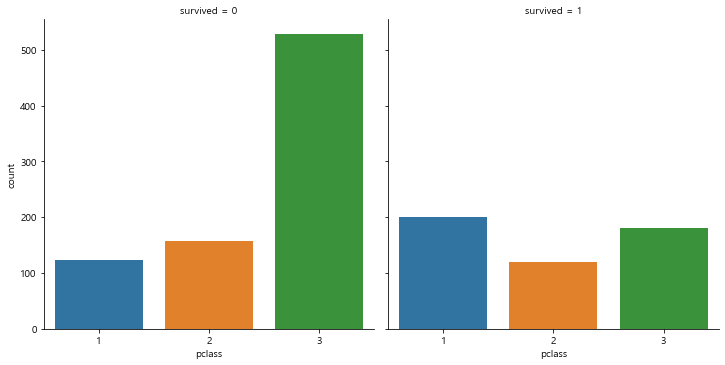

In [24]:
# 죽은 사람 중 1,2,3 등급 수, 산 사람 중 1,2,3 등급수
sns.catplot(x='pclass', col='survived', kind='count', data=df);

In [25]:
# 생존여부와 등급을 통한 그룹화
df.groupby(['survived','pclass'])['survived'].count()

survived  pclass
0         1         123
          2         158
          3         528
1         1         200
          2         119
          3         181
Name: survived, dtype: int64

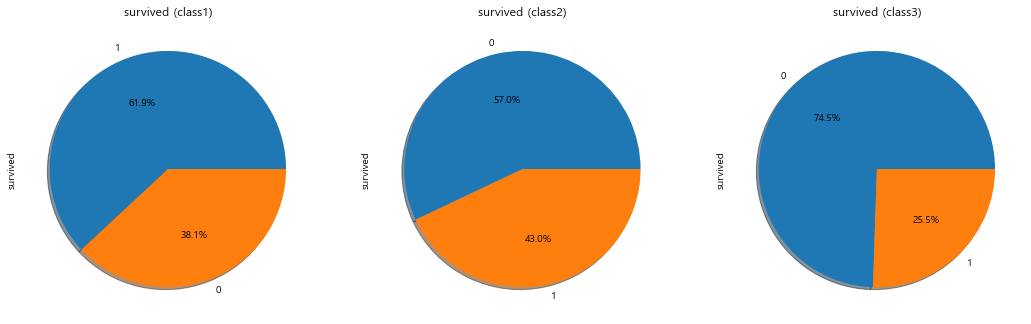

In [26]:
# 남자 중 몇 %가 살았는지, 여자 중 몇 %가 살았는지 알아보기 위해서 pie chart 그리기
f,ax=plt.subplots(1,3,figsize=(18,7))
df['survived'][df['pclass']==1].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
df['survived'][df['pclass']==2].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
df['survived'][df['pclass']==3].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('survived (class1)')
ax[1].set_title('survived (class2)')
ax[2].set_title('survived (class3)')

plt.show()

C:\Users\codud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


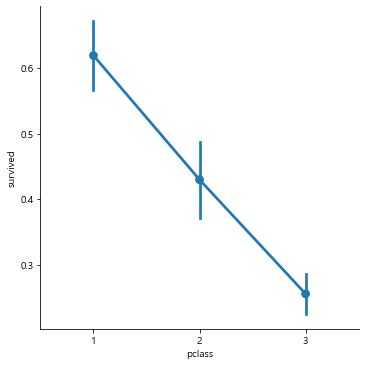

In [27]:
sns.catplot('pclass','survived', kind='point', data=df);

- 1등급의 61.9%는 살았고, 2등급의 43%가 살았고, 3등급의 25%가 살았다.
- 3등급으로 갈수록 생존율이 급격하게 떨어지는 것을 볼 수 있다.

### 나이별

<AxesSubplot:xlabel='age_cat', ylabel='count'>

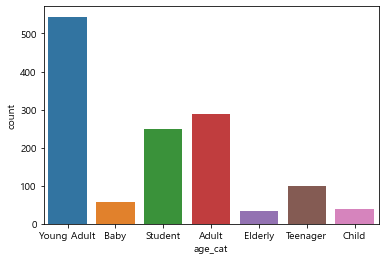

In [28]:
# age_cat의 데이터 분포 살펴보기
sns.countplot(x='age_cat', data=df)

In [29]:
# 생존여부와 나이 카테고리를 통한 그룹화
df.groupby(['survived','age_cat'])['survived'].count()

survived  age_cat    
0         Adult          170
          Baby            19
          Child           21
          Elderly         25
          Student        157
          Teenager        58
          Young Adult    359
1         Adult          119
          Baby            37
          Child           17
          Elderly          8
          Student         93
          Teenager        41
          Young Adult    185
Name: survived, dtype: int64

<AxesSubplot:xlabel='age_cat', ylabel='survived'>

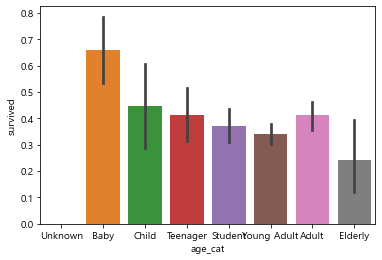

In [30]:
# 나이대별 살아남은 수 확인하기
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
sns.barplot(x='age_cat',y='survived',data=df, order=group_names)

<AxesSubplot:xlabel='age_cat', ylabel='survived'>

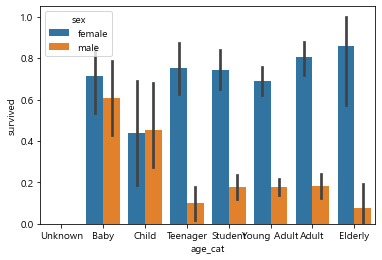

In [31]:
# 나이대, 성별 별 살아남은 수 확인하기
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
sns.barplot(x='age_cat',y='survived',hue='sex', data=df, order=group_names)

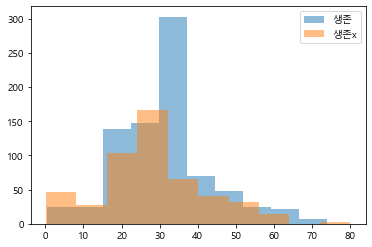

In [32]:
# 연령별 생존한 사람과 생존하지 못한 사람 비교
plt.hist(df[df['survived']==0]['age'], label = '생존', alpha=0.5)
plt.hist(df[df['survived']==1]['age'], label = '생존x', alpha=0.5)
plt.legend()

- 나이가 어린 사람들이 상대적으로 나이가 많은 사람들보다 많이 살아남았다.
- Baby는 살아남은 비율이 0.7에 가깝지만 Elderly는 살아남은 비율이 0.3에 미치지 못한다.
- 나이와 성별을 함께 그래프로 보았을 때 Baby와 Child에서는 성별 차이가 거의 나지 않지만 Teenager부터는 남자가 훨씬 많이 죽었다.
- 연령별 생존한 사람과 생존하지 못한 사람을 비교해 보았을 때, 30~40대에 특이하게 생존한 사람이 많은 것을 볼 수 있었다.

### 부부 혹은 형제 수 별

<AxesSubplot:xlabel='sibsp', ylabel='count'>

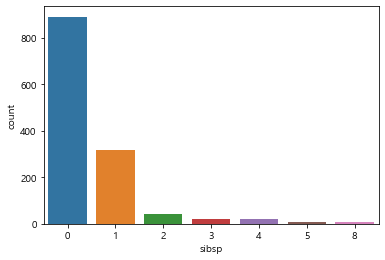

In [33]:
# 부부 혹은 형제 수 별 죽은 사람과 산 사람의 비율
sns.countplot(x='sibsp', data=df)

In [34]:
# 생존여부와 부부 혹은 형제 수 카테고리를 통한 그룹화
df.groupby(['survived','sibsp'])['survived'].count()

survived  sibsp
0         0        582
          1        156
          2         23
          3         14
          4         19
          5          6
          8          9
1         0        309
          1        163
          2         19
          3          6
          4          3
Name: survived, dtype: int64

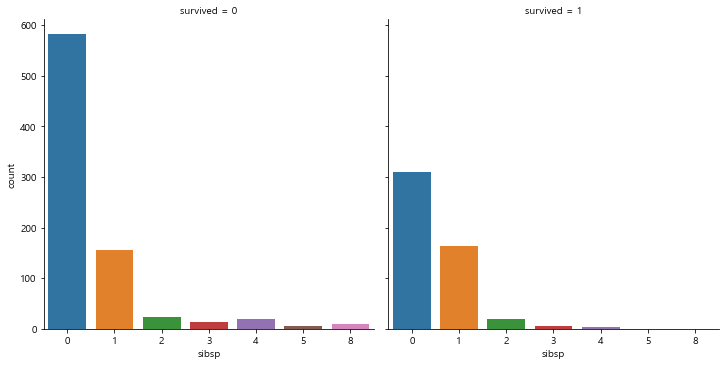

In [35]:
# 죽은 사람 중 부부 혹은 형제 수, 산 사람 중 부부 혹은 형제 수
sns.catplot(x='sibsp', col='survived', kind='count', data=df);

C:\Users\codud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


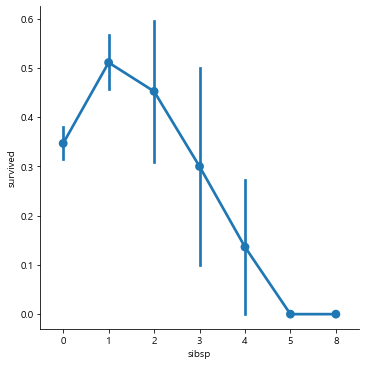

In [36]:
sns.catplot('sibsp','survived', kind='point', data=df);

- 부부 혹은 형제 수가 0명인 사람의 비율이 압도적으로 많다.
- 죽은 사람들 중에서 부부 혹은 형제 수가 0인 사람이 산 사람 중에서 부부 혹은 형제 수가 0인 사람보다 많다.
- 부부 혹은 형제 수가 1명일 때의 생존율이 가장 높고 부부 혹은 형제 수가 5명일 때와 8명일 때는 모두 죽었다.

### 가족 존재여부 별

<AxesSubplot:xlabel='family', ylabel='count'>

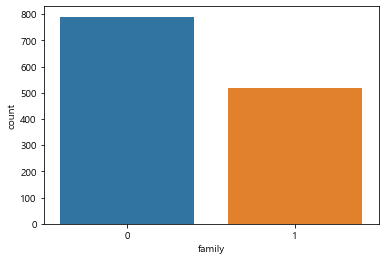

In [37]:
# 전체 데이터 중 가족이 한 명이라도 있는 사람과 없는 사람의 수
sns.countplot(x='family', data=df)

C:\Users\codud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


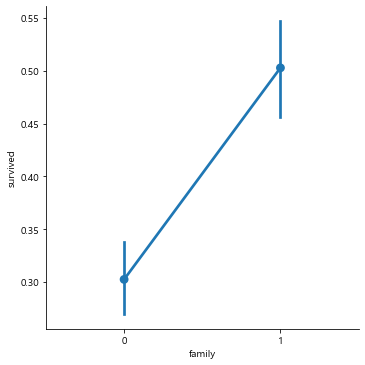

In [38]:
sns.catplot('family','survived', kind='point', data=df);

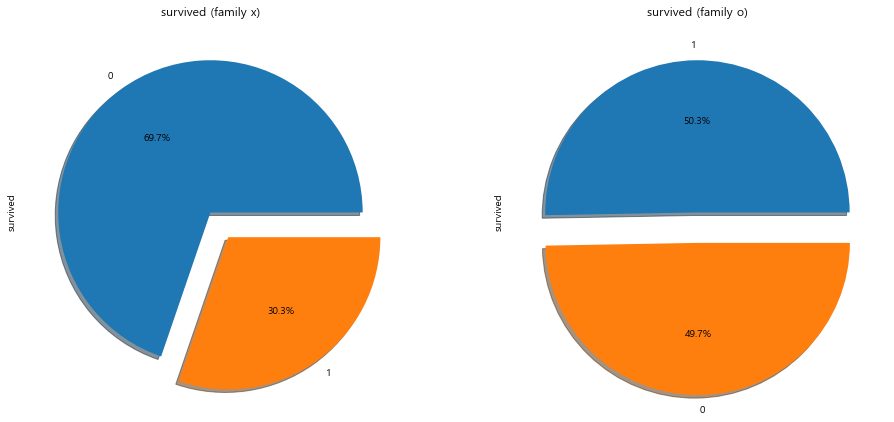

In [39]:
# 가족과 함께 타지 않은 사람들 중 몇 %가 살았는지, 가족과 함께 탄 사람들 중 몇 %가 살았는지 알아보기 위해서 pie chart 그리기
f,ax=plt.subplots(1,2,figsize=(16,7))
df['survived'][df['family']==0].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df['survived'][df['family']==1].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('survived (family x)')
ax[1].set_title('survived (family o)')

plt.show()

- 전체 데이터 중 가족과 함께 타지 않은 사람의 수는 가족과 함께 탄 사람의 수보다 많았다.
- 가족과 함께 타지 않은 사람의 생존율은 30.3%이고, 가족과 함께 탄 사람의 생존율은 50.3%이다.
- 가족과 함께 타지 않은 사람은 가족과 함께 탄 사람보다 더 많이 죽었다.

### 지불한 운임 별

C:\Users\codud\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


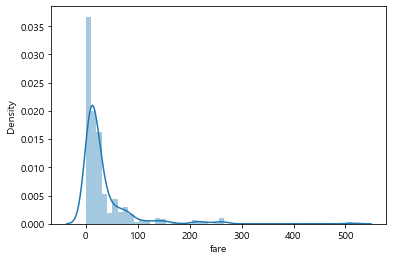

In [40]:
sns.distplot(df['fare']);

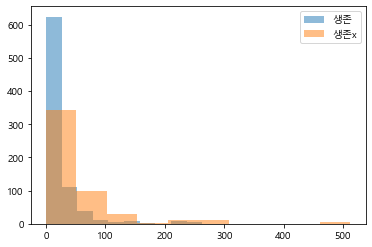

In [41]:
plt.hist(df[df['survived']==0]['fare'], label = '생존', alpha=0.5)
plt.hist(df[df['survived']==1]['fare'], label = '생존x', alpha=0.5)
plt.legend()

- 한쪽으로 치우쳐진 분포를 그리고 있는 것을 볼 수 있다. 
- 데이터는 대부분 지불 운임이 100이하에만 존재하고 있다.
- 매우 적은 운임을 지불한 사람들 중에는 생존한 사람이 생존하지 못한 사람보다 더 많다.
- 데이터의 분포를 보았을 때 500에 가까운 데이터는 outlier일 것이라고 의심해 볼 수 있을 것이라고 생각했다.

### 선착장 정보 별

<AxesSubplot:xlabel='embarked', ylabel='count'>

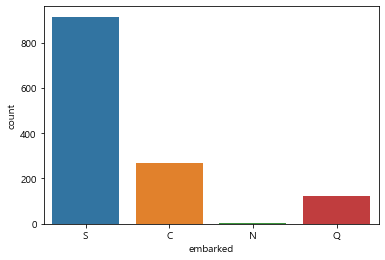

In [42]:
# embarked의 데이터 분포 살펴보기
sns.countplot(x='embarked', data=df)

In [43]:
# 생존여부와 선착장 정보를 통한 그룹화
df.groupby(['survived','embarked'])['survived'].count()

survived  embarked
0         C           120
          Q            79
          S           610
1         C           150
          N             2
          Q            44
          S           304
Name: survived, dtype: int64

<AxesSubplot:xlabel='embarked', ylabel='survived'>

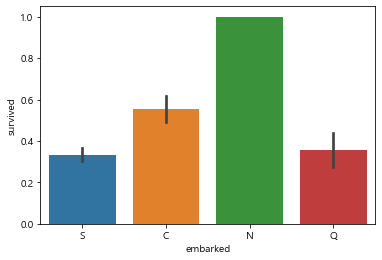

In [44]:
sns.barplot(x='embarked',y='survived',data=df)

<AxesSubplot:xlabel='embarked', ylabel='survived'>

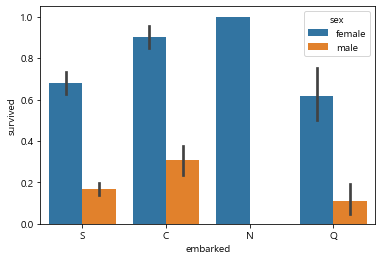

In [45]:
# 선착장, 성별 별 살아남은 수 확인하기
sns.barplot(x='embarked',y='survived',hue='sex', data=df)

- 선착장 정보가 존재하지 않는 데이터 2개는 모두 여성 데이터였고, 모두 생존하였다.
- S와 Q에 비해서 C 선착장을 이용한 사람들이 더 많이 살아남았다.

## 결론

- 타이타닉 데이터에는 결측치가 많이 존재하여 그것을 적절하게 전처리하는 과정이 필요했다.
- cabin 변수값과 같은 경우에는 특성을 찾아내 변수값을 새로 넣어줄 필요가 있었다.
- 생존자보다 사망자가 더 많은 데이터였다.
- 성별에 따른 생존율을 보았을 때, 남자 19%와 여자 72%로 많은 차이가 났다.
- 1등급의 61.9%는 살았고, 2등급의 43%가 살았고, 3등급의 25%가 살았다. -> 3등급으로 갈수록 생존율이 급격하게 떨어지는 것을 볼 수 있었다.
- 나이가 어린 사람이 상대적으로 나이가 많은 사람들보다 많이 살았다.
- 부부 혹은 형제 수가 1명일 때의 생존율이 가장 높고 부부 혹은 형제 수가 5명일 때와 8명일 때는 모두 죽었다.
- 가족과 함께 탄 사람은 혼자 탄 사람보다 더 많이 생존하였다.
- S와 Q에 비해서 C 선착장을 이용한 사람들이 더 많이 살아남았다.